In [1]:
# Reading the file 'pipeline.pkl':
import pickle
with open('pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/creditcard.csv")

y = df['Class'].copy()
X = df.drop(columns=['Class', 'Time']).copy()

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(
    X, y, test_size=0.3,
    random_state=42, stratify=y)

In [3]:
import shap

preprocessor = pipeline[:-1]
X_pp = preprocessor.transform(X_tr)

explainer = shap.TreeExplainer(pipeline[-1].best_estimator_)
shap_values = explainer.shap_values(X_pp)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


## Explicação global

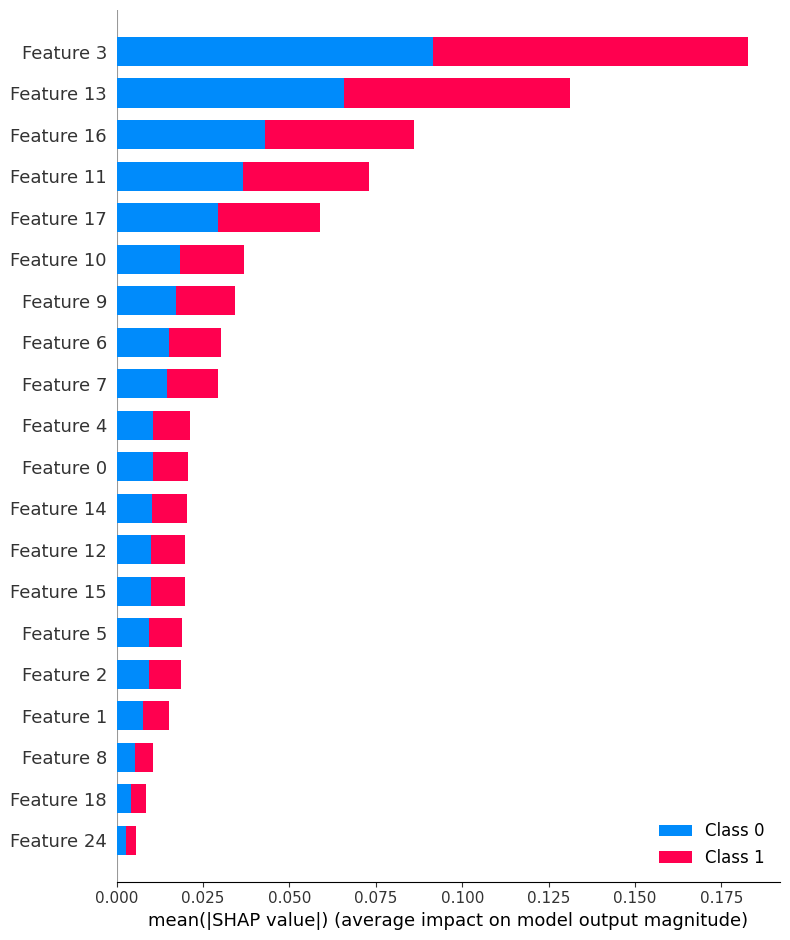

In [28]:
shap.summary_plot(shap_values, X_pp)

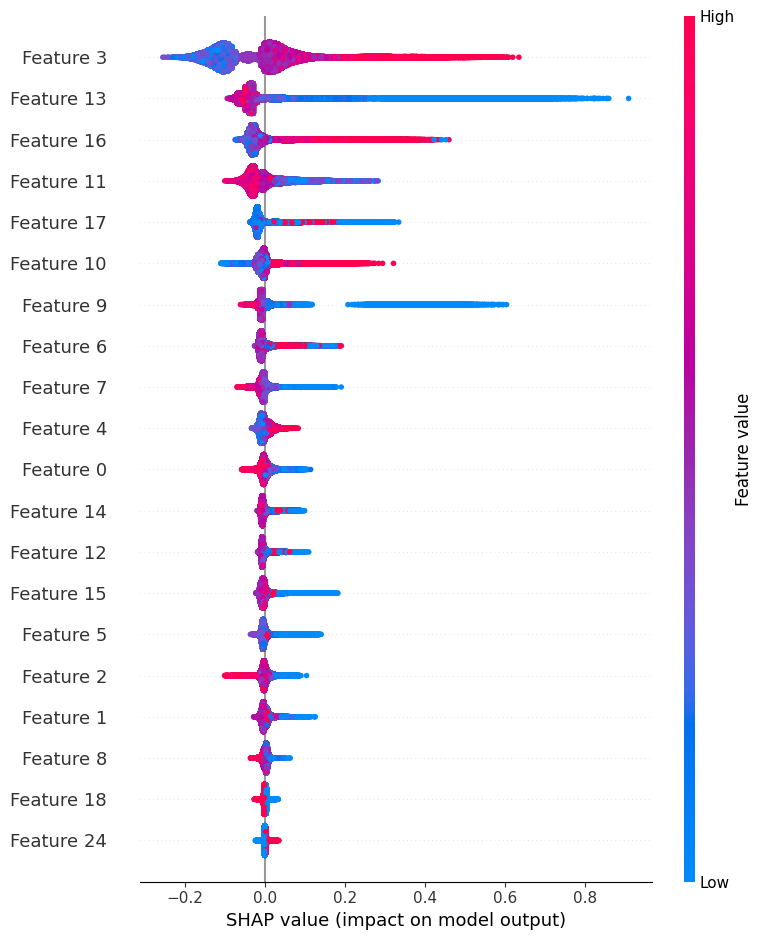

In [4]:
shap.summary_plot(shap_values[1], X_pp)

In [17]:
import shap
shap.initjs()

## Explicação local (decisão individual)

In [18]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_pp[0,:])

In [26]:
from shap import Explanation

explanation = Explanation(shap_values[1], base_values=explainer.expected_value[1])

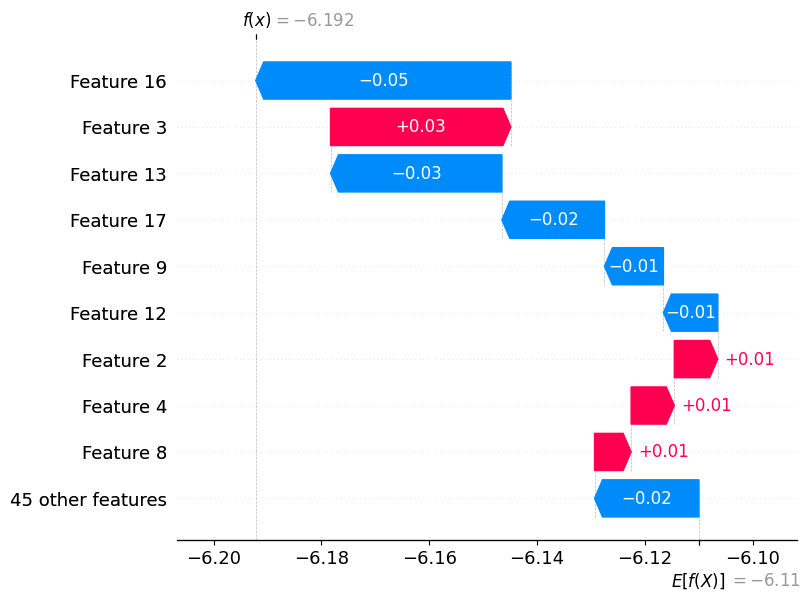

In [27]:
shap.plots.waterfall(explanation[0])